In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import numpy as np
import seaborn as sns

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r'C:\Users\Khushi\OneDrive\Desktop\project\CarbonEmission.csv')

In [5]:
df.head()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743


In [6]:
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)

Vehicle Type                     67.21
Body Type                         0.00
Waste Bag Size                    0.00
Cooking_With                      0.00
Recycling                         0.00
Energy efficiency                 0.00
How Long Internet Daily Hour      0.00
How Many New Clothes Monthly      0.00
How Long TV PC Daily Hour         0.00
Waste Bag Weekly Count            0.00
Vehicle Monthly Distance Km       0.00
Sex                               0.00
Frequency of Traveling by Air     0.00
Monthly Grocery Bill              0.00
Social Activity                   0.00
Transport                         0.00
Heating Energy Source             0.00
How Often Shower                  0.00
Diet                              0.00
CarbonEmission                    0.00
dtype: float64

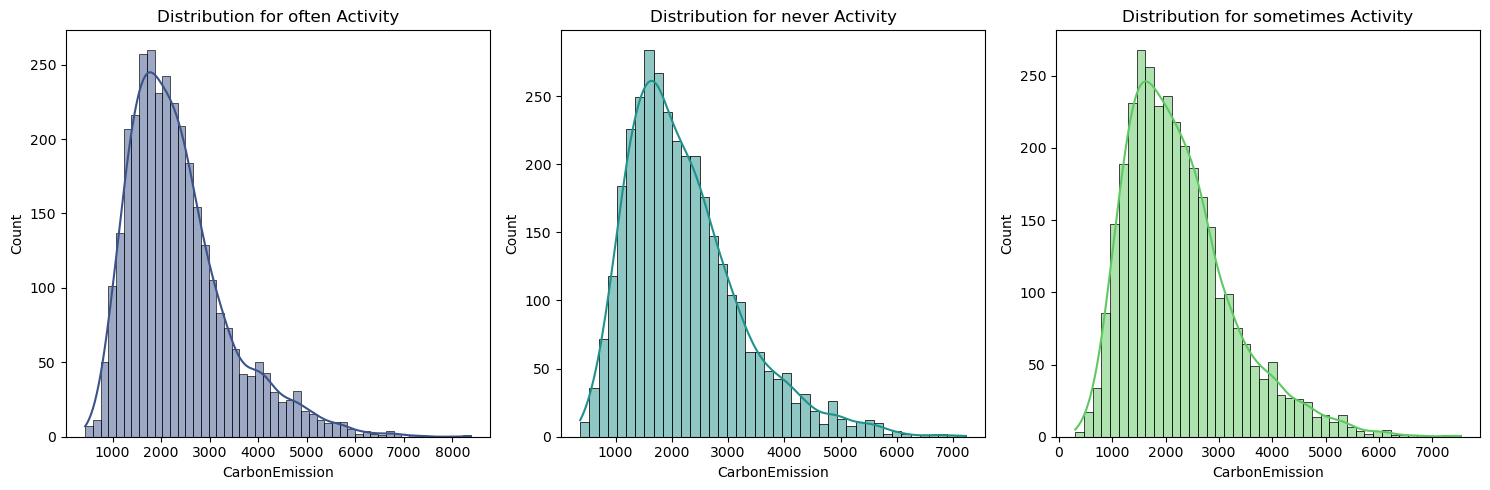

                 Mode         Mean  Median
Social Activity                           
never            1616  2209.652085  2018.0
often            1401  2347.318771  2149.0
sometimes        1348  2251.800611  2064.0


In [9]:
#Social Activity
unique_Social_Activity = df['Social Activity'].unique()
palette = sns.color_palette("viridis", len(unique_Social_Activity))

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

for i, activity in enumerate(unique_Social_Activity):
    ax = axes[i]
    activity_df = df[df['Social Activity'] == activity]
    sns.histplot(data=activity_df, x="CarbonEmission", color=palette[i], ax=ax, kde=True)
    ax.set_title(f"Distribution for {activity} Activity")

plt.tight_layout()
plt.show()

grouped = df.groupby('Social Activity')['CarbonEmission'].agg([lambda x: x.mode()[0] if not x.mode().empty else None, 'mean', 'median'])
grouped.columns = ['Mode', 'Mean', 'Median']

print(grouped)

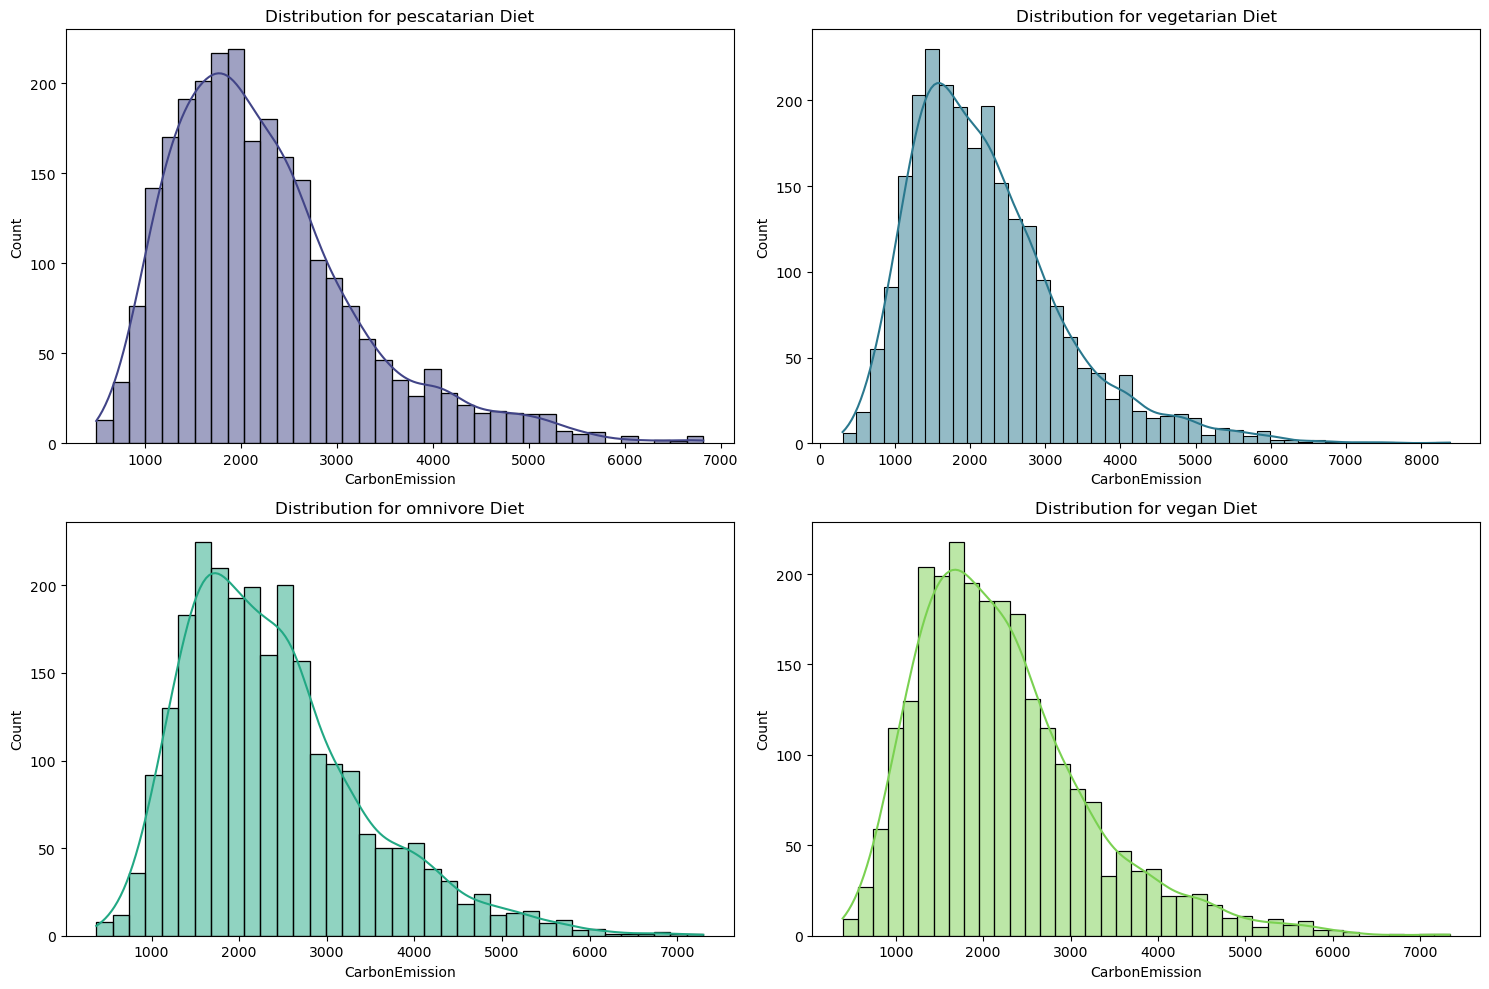

             Mode         Mean  Median
Diet                                  
omnivore     1875  2391.980738  2193.0
pescatarian  1814  2251.835552  2052.0
vegan        2165  2215.761314  2041.0
vegetarian   1651  2216.814408  2023.0


In [10]:
#Diet
unique_diets = df['Diet'].unique()
palette = sns.color_palette("viridis", len(unique_diets))

fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 

for i, diet in enumerate(unique_diets):
    ax = axes[i//2, i%2]
    diet_df = df[df['Diet'] == diet]
    sns.histplot(data=diet_df, x="CarbonEmission", color=palette[i], ax=ax, kde=True)
    ax.set_title(f"Distribution for {diet} Diet")

plt.tight_layout()
plt.show()

grouped = df.groupby('Diet')['CarbonEmission'].agg([lambda x: x.mode()[0] if not x.mode().empty else None, 'mean', 'median'])
grouped.columns = ['Mode', 'Mean', 'Median']

print(grouped)

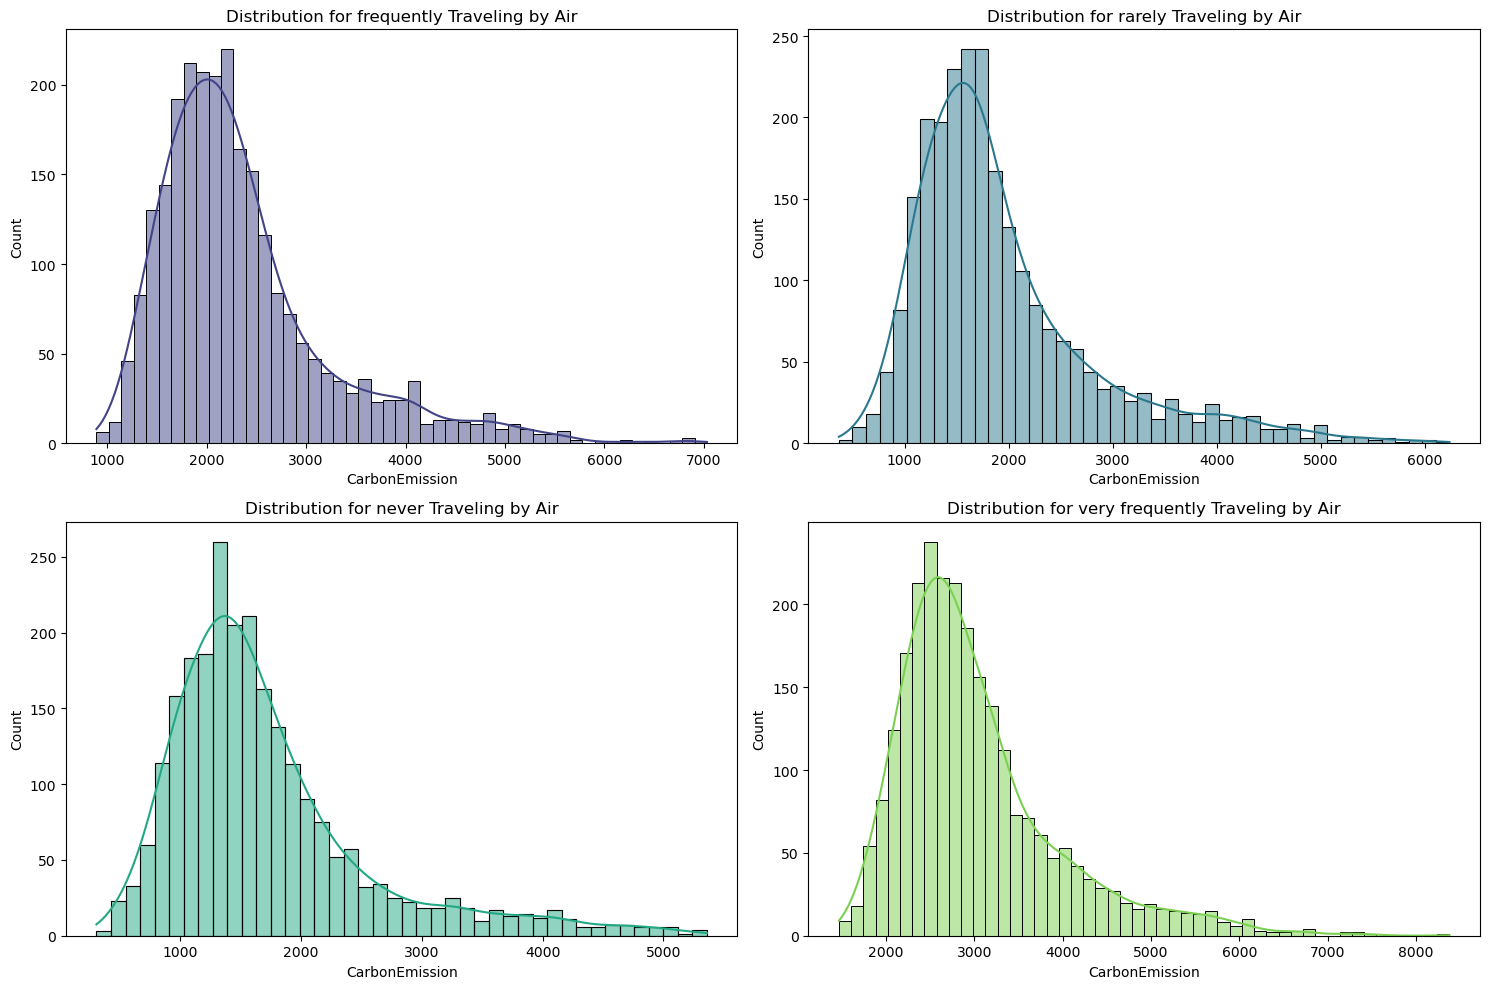

                               Mode         Mean  Median
Frequency of Traveling by Air                           
frequently                     1857  2362.866482  2160.5
never                          1616  1716.337129  1511.0
rarely                         1218  1945.872830  1704.0
very frequently                2554  3026.455906  2792.5


In [11]:
#Frequency of Traveling by Air
unique_Frequency_of_Traveling_by_Air = df['Frequency of Traveling by Air'].unique()
palette = sns.color_palette("viridis", len(unique_Frequency_of_Traveling_by_Air))

fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 

for i, Frequency_of_Traveling_by_Air in enumerate(unique_Frequency_of_Traveling_by_Air):
    ax = axes[i//2, i%2]
    diet_df = df[df['Frequency of Traveling by Air'] == Frequency_of_Traveling_by_Air]
    sns.histplot(data=diet_df, x="CarbonEmission", color=palette[i], ax=ax, kde=True)
    ax.set_title(f"Distribution for {Frequency_of_Traveling_by_Air} Traveling by Air")

plt.tight_layout()
plt.show()

grouped = df.groupby('Frequency of Traveling by Air')['CarbonEmission'].agg([lambda x: x.mode()[0] if not x.mode().empty else None, 'mean', 'median'])
grouped.columns = ['Mode', 'Mean', 'Median']

print(grouped)

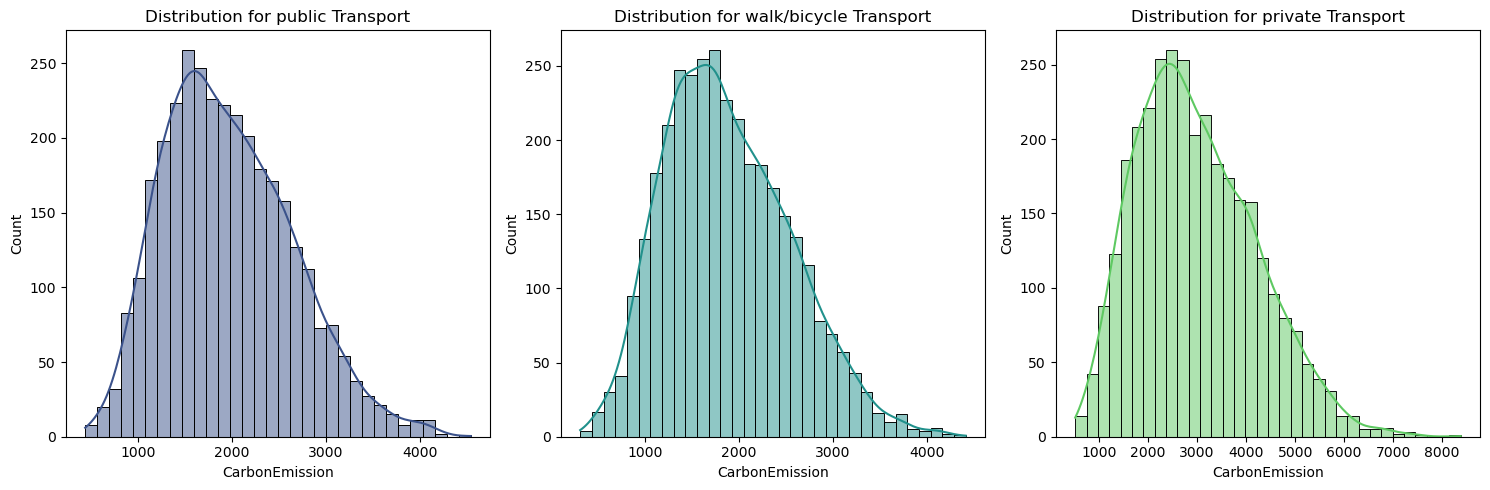

              Mode         Mean  Median
Transport                              
private       2207  2980.878012  2817.0
public        1484  1965.789314  1887.0
walk/bicycle  1279  1879.738547  1799.0


In [12]:
#Transport
unique_Transport = df['Transport'].unique()
palette = sns.color_palette("viridis", len(unique_Transport))
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 

for i, transport in enumerate(unique_Transport):
    ax = axes[i]
    activity_df = df[df['Transport'] == transport]
    sns.histplot(data=activity_df, x="CarbonEmission", color=palette[i], ax=ax, kde=True)
    ax.set_title(f"Distribution for {transport} Transport")

plt.tight_layout()
plt.show()

grouped = df.groupby('Transport')['CarbonEmission'].agg([lambda x: x.mode()[0] if not x.mode().empty else None, 'mean', 'median'])
grouped.columns = ['Mode', 'Mean', 'Median']

print(grouped)

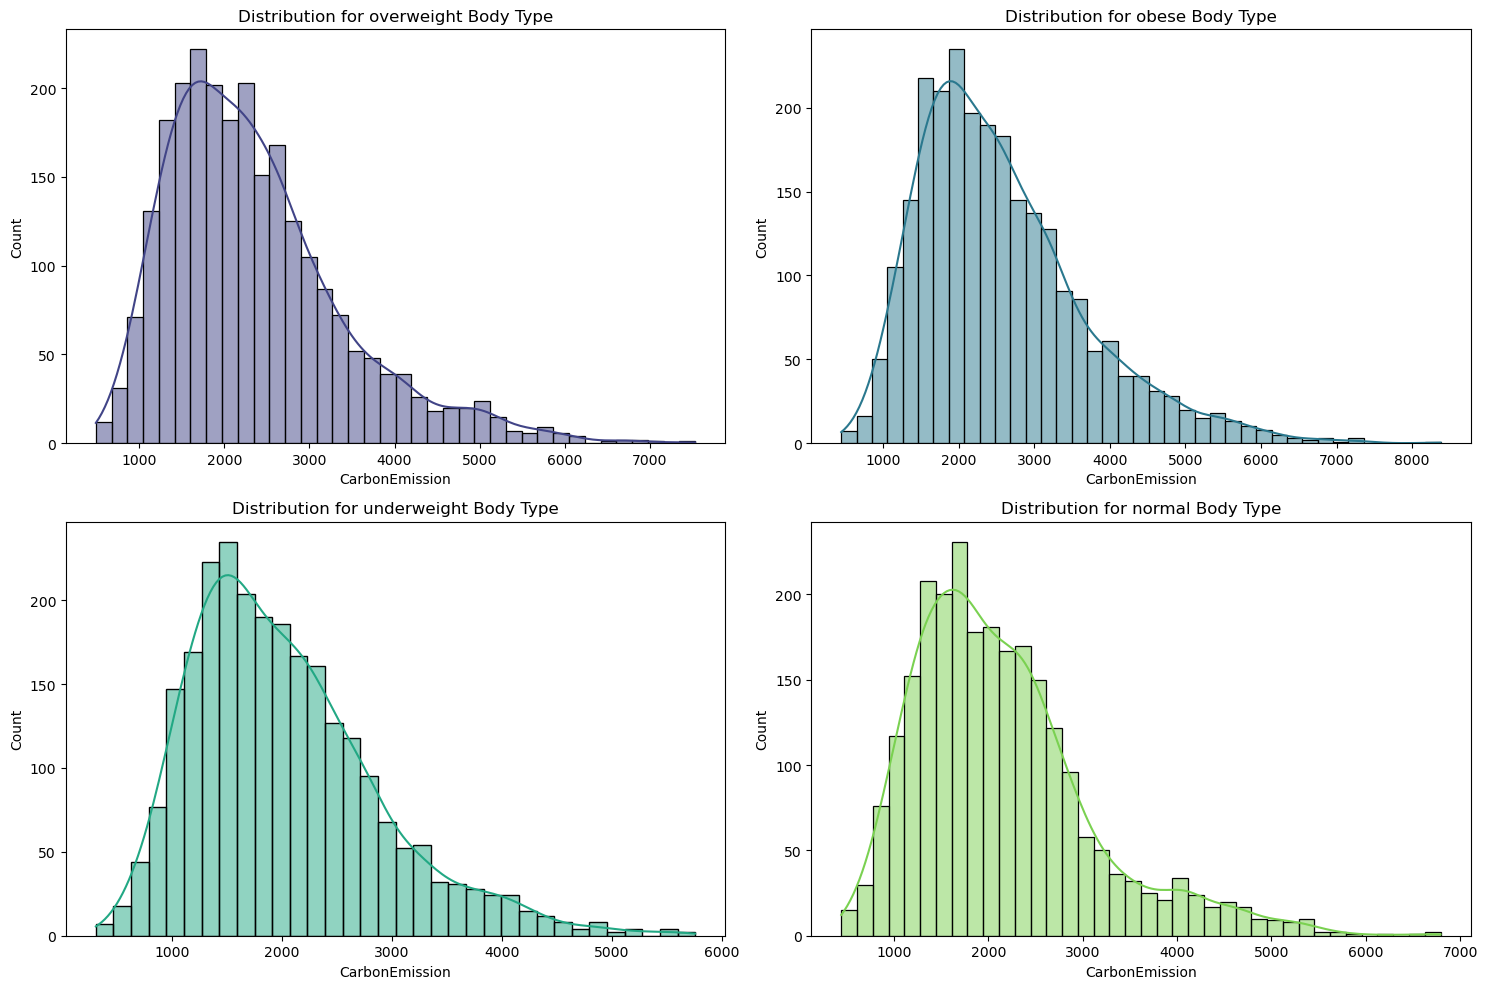

             Mode         Mean  Median
Body Type                             
normal       1323  2140.509503  1972.0
obese        1616  2561.212000  2360.0
overweight   2158  2358.919984  2161.0
underweight  1279  2019.027165  1868.0


In [13]:
#Body Type
unique_body_type = df['Body Type'].unique()
palette = sns.color_palette("viridis", len(unique_body_type))

fig, axes = plt.subplots(2, 2, figsize=(15, 10)) 

for i, body_type in enumerate(unique_body_type):
    ax = axes[i//2, i%2]
    diet_df = df[df['Body Type'] == body_type]
    sns.histplot(data=diet_df, x="CarbonEmission", color=palette[i], ax=ax, kde=True)
    ax.set_title(f"Distribution for {body_type} Body Type")

plt.tight_layout()
plt.show()

grouped = df.groupby('Body Type')['CarbonEmission'].agg([lambda x: x.mode()[0] if not x.mode().empty else None, 'mean', 'median'])
grouped.columns = ['Mode', 'Mean', 'Median']

print(grouped)